In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff

In [60]:
# Loading dataset
temp, meta = arff.loadarff('scm1d-train.arff')
print(temp.shape)

(8145,)


In [61]:
data = np.empty([temp.shape[0],len(temp[0])])
for i in range(0,data.shape[0]):
    for j in range(0,data.shape[1]):
        data[i][j] = np.array(temp[i][j])
print(data.shape)

(8145, 296)


In [62]:
# Separating features and labels
x_train = data[:,:280]
y_train = data[:,280:]
print(x_train.shape,y_train.shape)

(8145, 280) (8145, 16)


In [63]:
# Normalization (subtracting mean and dividing by variance)
x_train = x_train.T
for i in range(0,x_train.shape[0]):
    mean = np.mean(x_train[i])
    var = np.var(x_train[i])
    x_train[i] = x_train[i] - mean*np.ones(x_train[i].shape)
    x_train[i] = x_train[i]/var
x_train = x_train.T
y_train = y_train.T
for i in range(0,y_train.shape[0]):
    mean = np.mean(y_train[i])
    var = np.var(y_train[i])
    y_train[i] = y_train[i] - mean*np.ones(y_train[i].shape)
    y_train[i] = y_train[i]/var
y_train = y_train.T
print(x_train.shape,y_train.shape)

(8145, 280) (8145, 16)


In [64]:
# Creating (M-1)th degree polynomial basis function
M = 2
phi = np.empty([x_train.shape[0],x_train.shape[1]*M])
# print(phi.shape)
for i in range(0,phi.shape[0]):
    k = 0
    for j in range(0,int(phi.shape[1]/M)):
        for m in range(0,M):
            phi[i,k] = x_train[i,j]**m
            k+=1
print(phi.shape)

(8145, 560)


In [65]:
# training using graient descent
epochs = 1800
w = np.zeros([phi.shape[1],1])
lr = 0.00001 # learning rate
batch_size = 50
batch = int(x_train.shape[0]/batch_size)
# print(batch)
loss = []
for i in range(0,epochs):
    for b in range(0,batch):
        w= w - lr*(-2*(np.matmul(phi[b:b+batch_size].T,y_train[b:b+batch_size]-np.matmul(phi[b:b+batch_size],w))))
    l1 = (np.sum((y_train-np.matmul(phi,w)))**2)/y_train.shape[0]
    print("Epoch",i,"Loss",l1)
    loss.append(l1)

Epoch 0 Loss 4.818233273034933
Epoch 1 Loss 4.810852386982911
Epoch 2 Loss 4.803479964613333
Epoch 3 Loss 4.796115998454407
Epoch 4 Loss 4.788760481040277
Epoch 5 Loss 4.781413404911
Epoch 6 Loss 4.774074762612536
Epoch 7 Loss 4.766744546696712
Epoch 8 Loss 4.759422749721312
Epoch 9 Loss 4.752109364249961
Epoch 10 Loss 4.744804382852195
Epoch 11 Loss 4.737507798103406
Epoch 12 Loss 4.730219602584917
Epoch 13 Loss 4.722939788883856
Epoch 14 Loss 4.7156683495932805
Epoch 15 Loss 4.708405277312077
Epoch 16 Loss 4.701150564645013
Epoch 17 Loss 4.693904204202695
Epoch 18 Loss 4.686666188601597
Epoch 19 Loss 4.6794365104640345
Epoch 20 Loss 4.672215162418163
Epoch 21 Loss 4.665002137097984
Epoch 22 Loss 4.65779742714333
Epoch 23 Loss 4.650601025199859
Epoch 24 Loss 4.643412923919061
Epoch 25 Loss 4.63623311595826
Epoch 26 Loss 4.629061593980555
Epoch 27 Loss 4.621898350654933
Epoch 28 Loss 4.614743378656102
Epoch 29 Loss 4.607596670664636
Epoch 30 Loss 4.600458219366888
Epoch 31 Loss 4.59332

Epoch 257 Loss 3.1798862589305745
Epoch 258 Loss 3.1744505306391693
Epoch 259 Loss 3.169021528576608
Epoch 260 Loss 3.1635992466548637
Epoch 261 Loss 3.1581836787907993
Epoch 262 Loss 3.1527748189061495
Epoch 263 Loss 3.147372660927534
Epoch 264 Loss 3.1419771987864356
Epoch 265 Loss 3.136588426419211
Epoch 266 Loss 3.1312063377670865
Epoch 267 Loss 3.1258309267761333
Epoch 268 Loss 3.1204621873972895
Epoch 269 Loss 3.1151001135863483
Epoch 270 Loss 3.1097446993039526
Epoch 271 Loss 3.1043959385155735
Epoch 272 Loss 3.0990538251915583
Epoch 273 Loss 3.0937183533070662
Epoch 274 Loss 3.0883895168421023
Epoch 275 Loss 3.08306730978149
Epoch 276 Loss 3.0777517261149057
Epoch 277 Loss 3.072442759836838
Epoch 278 Loss 3.0671404049465827
Epoch 279 Loss 3.0618446554482777
Epoch 280 Loss 3.05655550535085
Epoch 281 Loss 3.051272948668049
Epoch 282 Loss 3.045996979418438
Epoch 283 Loss 3.0407275916253704
Epoch 284 Loss 3.035464779317008
Epoch 285 Loss 3.0302085365263043
Epoch 286 Loss 3.02495885

Epoch 503 Loss 2.0311717907604763
Epoch 504 Loss 2.0272186935193908
Epoch 505 Loss 2.0232709634095003
Epoch 506 Loss 2.0193285954398967
Epoch 507 Loss 2.01539158462375
Epoch 508 Loss 2.0114599259782655
Epoch 509 Loss 2.0075336145247054
Epoch 510 Loss 2.0036126452883987
Epoch 511 Loss 1.999697013298691
Epoch 512 Loss 1.9957867135889964
Epoch 513 Loss 1.9918817411967482
Epoch 514 Loss 1.9879820911634272
Epoch 515 Loss 1.9840877585345498
Epoch 516 Loss 1.980198738359658
Epoch 517 Loss 1.9763150256923139
Epoch 518 Loss 1.972436615590119
Epoch 519 Loss 1.9685635031146873
Epoch 520 Loss 1.9646956833316558
Epoch 521 Loss 1.9608331513106625
Epoch 522 Loss 1.9569759021253814
Epoch 523 Loss 1.9531239308534714
Epoch 524 Loss 1.9492772325766217
Epoch 525 Loss 1.9454358023805
Epoch 526 Loss 1.941599635354793
Epoch 527 Loss 1.9377687265931747
Epoch 528 Loss 1.9339430711933114
Epoch 529 Loss 1.9301226642568743
Epoch 530 Loss 1.9263075008895023
Epoch 531 Loss 1.9224975762008354
Epoch 532 Loss 1.918692

Epoch 754 Loss 1.1949726279813937
Epoch 755 Loss 1.1922201806973183
Epoch 756 Loss 1.1894719675069951
Epoch 757 Loss 1.1867279843473866
Epoch 758 Loss 1.1839882271588003
Epoch 759 Loss 1.1812526918848973
Epoch 760 Loss 1.1785213744726863
Epoch 761 Loss 1.1757942708725209
Epoch 762 Loss 1.173071377038101
Epoch 763 Loss 1.1703526889264644
Epoch 764 Loss 1.1676382024979892
Epoch 765 Loss 1.1649279137163908
Epoch 766 Loss 1.1622218185487163
Epoch 767 Loss 1.15951991296534
Epoch 768 Loss 1.1568221929399731
Epoch 769 Loss 1.154128654449643
Epoch 770 Loss 1.1514392934747013
Epoch 771 Loss 1.148754105998834
Epoch 772 Loss 1.1460730880090235
Epoch 773 Loss 1.1433962354955869
Epoch 774 Loss 1.1407235444521426
Epoch 775 Loss 1.1380550108756216
Epoch 776 Loss 1.1353906307662653
Epoch 777 Loss 1.132730400127621
Epoch 778 Loss 1.130074314966537
Epoch 779 Loss 1.1274223712931613
Epoch 780 Loss 1.1247745651209393
Epoch 781 Loss 1.1221308924666171
Epoch 782 Loss 1.1194913493502274
Epoch 783 Loss 1.1168

Epoch 1002 Loss 0.6323404454517061
Epoch 1003 Loss 0.6305216532290032
Epoch 1004 Loss 0.6287061840313694
Epoch 1005 Loss 0.6268940345535633
Epoch 1006 Loss 0.6250852014931144
Epoch 1007 Loss 0.6232796815503248
Epoch 1008 Loss 0.6214774714282643
Epoch 1009 Loss 0.6196785678327692
Epoch 1010 Loss 0.6178829674724413
Epoch 1011 Loss 0.6160906670586418
Epoch 1012 Loss 0.6143016633054946
Epoch 1013 Loss 0.6125159529298766
Epoch 1014 Loss 0.6107335326514245
Epoch 1015 Loss 0.6089543991925289
Epoch 1016 Loss 0.6071785492783276
Epoch 1017 Loss 0.6054059796367111
Epoch 1018 Loss 0.6036366869983181
Epoch 1019 Loss 0.6018706680965268
Epoch 1020 Loss 0.6001079196674631
Epoch 1021 Loss 0.598348438449994
Epoch 1022 Loss 0.5965922211857201
Epoch 1023 Loss 0.5948392646189832
Epoch 1024 Loss 0.593089565496859
Epoch 1025 Loss 0.5913431205691542
Epoch 1026 Loss 0.589599926588404
Epoch 1027 Loss 0.5878599803098773
Epoch 1028 Loss 0.5861232784915629
Epoch 1029 Loss 0.5843898178941762
Epoch 1030 Loss 0.58265

Epoch 1240 Loss 0.28620276497619435
Epoch 1241 Loss 0.2850875170897685
Epoch 1242 Loss 0.2839748792314506
Epoch 1243 Loss 0.2828648486989139
Epoch 1244 Loss 0.28175742279213933
Epoch 1245 Loss 0.2806525988134063
Epoch 1246 Loss 0.27955037406730093
Epoch 1247 Loss 0.2784507458607076
Epoch 1248 Loss 0.27735371150280724
Epoch 1249 Loss 0.27625926830507996
Epoch 1250 Loss 0.2751674135812987
Epoch 1251 Loss 0.27407814464753044
Epoch 1252 Loss 0.27299145882213344
Epoch 1253 Loss 0.2719073534257532
Epoch 1254 Loss 0.27082582578132536
Epoch 1255 Loss 0.2697468732140686
Epoch 1256 Loss 0.2686704930514896
Epoch 1257 Loss 0.26759668262337144
Epoch 1258 Loss 0.2665254392617842
Epoch 1259 Loss 0.26545676030107074
Epoch 1260 Loss 0.26439064307785426
Epoch 1261 Loss 0.26332708493103213
Epoch 1262 Loss 0.2622660832017749
Epoch 1263 Loss 0.26120763523352347
Epoch 1264 Loss 0.26015173837199124
Epoch 1265 Loss 0.259098389965158
Epoch 1266 Loss 0.25804758736327005
Epoch 1267 Loss 0.2569993279188359
Epoch 

Epoch 1472 Loss 0.09211379044271405
Epoch 1473 Loss 0.09153618932242415
Epoch 1474 Loss 0.09096062952647802
Epoch 1475 Loss 0.09038710884187534
Epoch 1476 Loss 0.08981562505753593
Epoch 1477 Loss 0.08924617596430234
Epoch 1478 Loss 0.08867875935493419
Epoch 1479 Loss 0.08811337302411022
Epoch 1480 Loss 0.08755001476842485
Epoch 1481 Loss 0.08698868238638603
Epoch 1482 Loss 0.08642937367841665
Epoch 1483 Loss 0.08587208644684978
Epoch 1484 Loss 0.08531681849592958
Epoch 1485 Loss 0.08476356763180826
Epoch 1486 Loss 0.08421233166254359
Epoch 1487 Loss 0.08366310839810234
Epoch 1488 Loss 0.08311589565035184
Epoch 1489 Loss 0.08257069123306432
Epoch 1490 Loss 0.08202749296191195
Epoch 1491 Loss 0.08148629865446685
Epoch 1492 Loss 0.08094710613019925
Epoch 1493 Loss 0.08040991321047515
Epoch 1494 Loss 0.07987471771855702
Epoch 1495 Loss 0.07934151747959976
Epoch 1496 Loss 0.07881031032065061
Epoch 1497 Loss 0.0782810940706477
Epoch 1498 Loss 0.07775386656041805
Epoch 1499 Loss 0.07722862562

Epoch 1698 Loss 0.009471953989451448
Epoch 1699 Loss 0.00930292050475233
Epoch 1700 Loss 0.009135474317303587
Epoch 1701 Loss 0.00896961361205882
Epoch 1702 Loss 0.008805336575578807
Epoch 1703 Loss 0.008642641396029414
Epoch 1704 Loss 0.008481526263181893
Epoch 1705 Loss 0.008321989368409983
Epoch 1706 Loss 0.008164028904689551
Epoch 1707 Loss 0.008007643066596928
Epoch 1708 Loss 0.007852830050308101
Epoch 1709 Loss 0.007699588053596503
Epoch 1710 Loss 0.0075479152758331156
Epoch 1711 Loss 0.00739780991798379
Epoch 1712 Loss 0.00724927018260901
Epoch 1713 Loss 0.007102294273862054
Epoch 1714 Loss 0.006956880397487954
Epoch 1715 Loss 0.006813026760822035
Epoch 1716 Loss 0.006670731572789278
Epoch 1717 Loss 0.006529993043901659
Epoch 1718 Loss 0.006390809386258833
Epoch 1719 Loss 0.0062531788135448555
Epoch 1720 Loss 0.0061170995410286385
Epoch 1721 Loss 0.00598256978556161
Epoch 1722 Loss 0.0058495877655766896
Epoch 1723 Loss 0.005718151701087177
Epoch 1724 Loss 0.005588259813685521
Ep

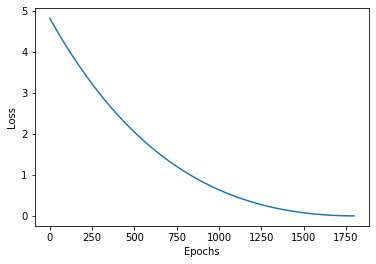

In [66]:
#plotting epoch vs training loss
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()